In [1]:
import pandas as pd

In [2]:
sales_data = pd.read_csv(".\Pandas-Data-Science-Tasks-master\SalesData\Sales Data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/2019,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/2019,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/2019,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/2019,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/2019,"387 10th St, Austin, TX 73301"


In [3]:
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"] = sales_data["Month"].astype("int")

In [4]:
sales_data.rename(columns = {"Price Each":"Unit Price"}, inplace = True)
sales_data.head()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/2019,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/2019,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/2019,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/2019,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/2019,"387 10th St, Austin, TX 73301",1


*adding sales column*

In [5]:
sales_data["Sales"] = sales_data["Quantity Ordered"] * sales_data["Unit Price"]

In [6]:
columns = ["Order ID","Product","Order Date","Month","Quantity Ordered","Unit Price","Sales","Purchase Address"]
sales_data = sales_data[columns]
sales_data.head()

,Order ID,Product,Order Date,Month,Quantity Ordered,Unit Price,Sales,Purchase Address
0,141234,iPhone,01/22/2019,1,1,700.00,700.00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,01/28/2019,1,1,14.95,14.95,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,01/17/2019,1,2,11.99,23.98,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,01/05/2019,1,1,149.99,149.99,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,01/25/2019,1,1,11.99,11.99,"387 10th St, Austin, TX 73301"


*the best month for sales*

In [7]:
sales_by_month = sales_data.groupby("Month").sum("Sales")
sales_by_month = sales_by_month.drop(["Unit Price","Order ID"], axis=1)
sales_by_month_descending = sales_by_month.sort_values(["Sales"], ascending=False)
sales_by_month_descending.head(12)

,Quantity Ordered,Sales
Month,,
12,28114,4613443.34
10,22703,3736726.88
4,20558,3390670.24
11,19798,3199603.20
5,18667,3152606.75
3,17005,2807100.38
7,16072,2647775.76
6,15253,2577802.26
8,13448,2244467.88


In [8]:
!pip install matplotlib
from matplotlib import pyplot as plt


Text(0.5, 0, 'Month')

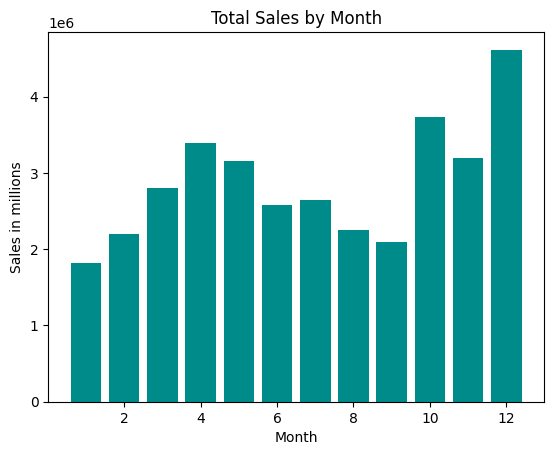

In [9]:
Months = range(1,13)
plt.bar(Months,sales_by_month["Sales"], color="DarkCyan")
plt.title("Total Sales by Month")
plt.ylabel("Sales in millions")
plt.xlabel("Month")

*City that sold the most product:* Add city column

In [10]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]
    
sales_data["City"] = sales_data["Purchase Address"].apply(lambda x: f"{get_city(x)} {get_state(x)}")

sales_data.head()


,Order ID,Product,Order Date,Month,Quantity Ordered,Unit Price,Sales,Purchase Address,City
0,141234,iPhone,01/22/2019,1,1,700.00,700.00,"944 Walnut St, Boston, MA 02215",Boston MA
1,141235,Lightning Charging Cable,01/28/2019,1,1,14.95,14.95,"185 Maple St, Portland, OR 97035",Portland OR
2,141236,Wired Headphones,01/17/2019,1,2,11.99,23.98,"538 Adams St, San Francisco, CA 94016",San Francisco CA
3,141237,27in FHD Monitor,01/05/2019,1,1,149.99,149.99,"738 10th St, Los Angeles, CA 90001",Los Angeles CA
4,141238,Wired Headphones,01/25/2019,1,1,11.99,11.99,"387 10th St, Austin, TX 73301",Austin TX


In [12]:
sales_by_city = sales_data.groupby("City").sum("Sales")
sales_by_city = sales_by_city.drop(["Unit Price","Order ID","Month"], axis=1)
sales_by_city_descending = sales_by_city.sort_values(["Sales"], ascending=False)
sales_by_city_descending.head(10)

,Quantity Ordered,Sales
City,,
San Francisco CA,50239,8262203.91
Los Angeles CA,33289,5452570.80
New York City NY,27932,4664317.43
Boston MA,22528,3661642.01
Atlanta GA,16602,2795498.58
Dallas TX,16730,2767975.40
Seattle WA,16553,2747755.48
Portland OR,11303,1870732.34
Austin TX,11153,1819581.75


Text(0.5, 0, 'City Name')

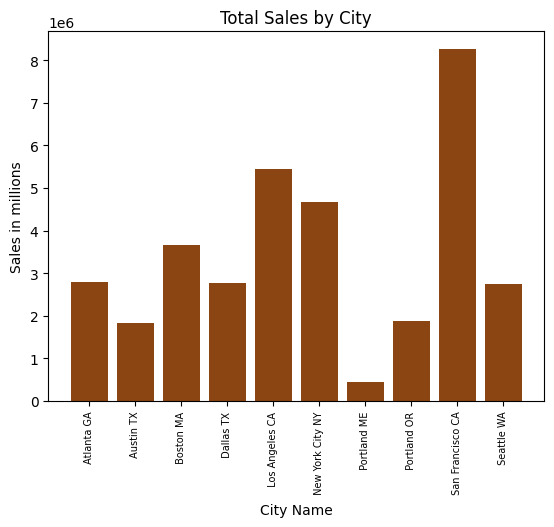

In [13]:
cities = [city for city, df in sales_data.groupby("City")]
plt.bar(cities, sales_by_city["Sales"], color = "SaddleBrown")
plt.xticks(cities,rotation = "vertical", size = 7)
plt.title("Total Sales by City")
plt.ylabel("Sales in millions")
plt.xlabel("City Name")

*products most often sold together*

In [14]:
df = sales_data[sales_data["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Order Date,Month,Quantity Ordered,Unit Price,Sales,Purchase Address,City
41,141275,USB-C Charging Cable,01/07/2019,1,1,11.95,11.95,"610 Walnut St, Austin, TX 73301",Austin TX
42,141275,Wired Headphones,01/07/2019,1,1,11.99,11.99,"610 Walnut St, Austin, TX 73301",Austin TX
57,141290,Apple Airpods Headphones,01/02/2019,1,1,150.00,150.00,"4 1st St, Los Angeles, CA 90001",Los Angeles CA
58,141290,AA Batteries (4-pack),01/02/2019,1,3,3.84,11.52,"4 1st St, Los Angeles, CA 90001",Los Angeles CA
133,141365,Vareebadd Phone,01/10/2019,1,1,400.00,400.00,"20 Dogwood St, New York City, NY 10001",New York City NY


In [15]:
import warnings
warnings.filterwarnings("ignore")

df["Bought_Together"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
df.head()
df = df.drop_duplicates(subset=["Order ID"], keep='first')
df.head()

,Order ID,Product,Order Date,Month,Quantity Ordered,Unit Price,Sales,Purchase Address,City,Bought_Together
41,141275,USB-C Charging Cable,01/07/2019,1,1,11.95,11.95,"610 Walnut St, Austin, TX 73301",Austin TX,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,01/02/2019,1,1,150.00,150.00,"4 1st St, Los Angeles, CA 90001",Los Angeles CA,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,01/10/2019,1,1,400.00,400.00,"20 Dogwood St, New York City, NY 10001",New York City NY,"Vareebadd Phone, Wired Headphones"
153,141384,Google Phone,01/03/2019,1,1,600.00,600.00,"223 Jackson St, Boston, MA 02215",Boston MA,"Google Phone, USB-C Charging Cable"
220,141450,Google Phone,01/12/2019,1,1,600.00,600.00,"521 Park St, San Francisco, CA 94016",San Francisco CA,"Google Phone, Bose SoundSport Headphones"


In [16]:
from itertools import combinations
from collections import Counter

*top 5 products most commonly bought in twos*

In [17]:
count = Counter()

for row in df["Bought_Together"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(5):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361


*most sold product*

In [18]:
most_sold_product = sales_data.groupby("Product").sum("Sales")
most_sold_product = most_sold_product.drop(["Unit Price","Order ID","Month"], axis=1)
most_sold_product_descending = most_sold_product.sort_values(["Sales"], ascending=False)
most_sold_product_descending.head(10)

,Quantity Ordered,Sales
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56
34in Ultrawide Monitor,6199,2355558.01
Apple Airpods Headphones,15661,2349150.00
Flatscreen TV,4819,1445700.00
Bose SoundSport Headphones,13457,1345565.43


In [19]:
average_product_price = sales_data.groupby("Product").mean("Unit Price")["Unit Price"]
print(average_product_price)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Unit Price, dtype: float64


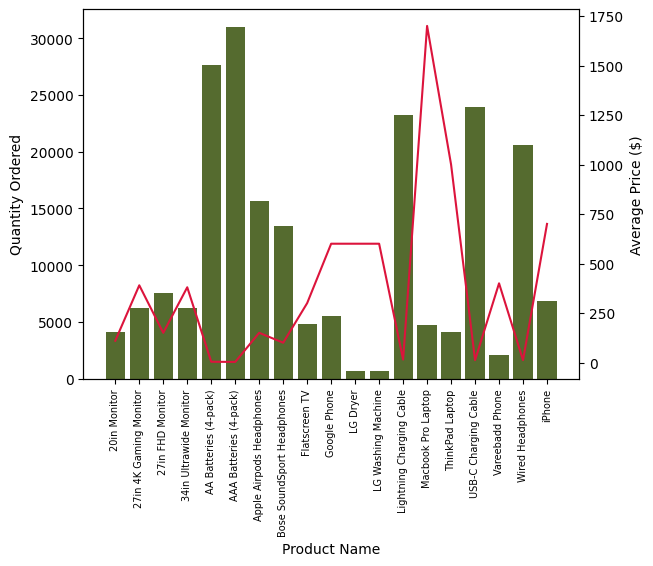

In [21]:
product_group = sales_data.groupby("Product")
quantity_ordered = product_group.sum("Quantity Ordered")["Quantity Ordered"]

products = [product for product, df in product_group]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "DarkOliveGreen")
ax2.plot(products, average_product_price, color = "Crimson")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax1.set_xticklabels(products, rotation = "vertical", size = 7)
ax2.set_ylabel("Average Price ($)")

plt.show()